<a href="https://colab.research.google.com/github/ghonaimy/project-/blob/main/Kaggle_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')

df= pd.read_csv(r'https://github.com/ghonaimy/project-/raw/main/Walmart%20(1)%20(1).csv')

df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Linear trend,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,1,05/02/2010,1643690.90,0,42.31,2.572,211.096358,8.106,1497908.58,NaN,NaN,NaN
1,1,12/02/2010,1641957.44,1,38.51,2.548,211.242170,8.106,1498716.41,NaN,NaN,NaN
2,1,19/02/2010,1611968.17,0,39.93,2.514,211.289143,8.106,1499524.24,NaN,NaN,NaN
3,1,26/02/2010,1409727.59,0,46.63,2.561,211.319643,8.106,1500332.07,NaN,NaN,NaN
4,1,05/03/2010,1554806.68,0,46.50,2.625,211.350143,8.106,1501139.90,NaN,NaN,NaN


In [3]:
df.isnull().sum()

Store               0
Date                0
Weekly_Sales        0
Holiday_Flag        0
Temperature         0
Fuel_Price          0
CPI                 0
Unemployment        0
Linear trend        0
Unnamed: 9       6435
Unnamed: 10      6435
Unnamed: 11      6434
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Store          6435 non-null   int64  
 1   Date           6435 non-null   object 
 2   Weekly_Sales   6435 non-null   float64
 3   Holiday_Flag   6435 non-null   int64  
 4   Temperature    6435 non-null   float64
 5   Fuel_Price     6435 non-null   float64
 6   CPI            6435 non-null   float64
 7   Unemployment   6435 non-null   float64
 8   Linear trend   6435 non-null   float64
 9   Unnamed: 9     0 non-null      float64
 10  Unnamed: 10    0 non-null      float64
 11  Unnamed: 11    1 non-null      object 
dtypes: float64(8), int64(2), object(2)
memory usage: 603.4+ KB


In [5]:
df.drop(['Unnamed: 9'], axis="columns", inplace=True)
df.drop(['Unnamed: 10'], axis="columns", inplace=True)
df.drop(['Unnamed: 11'], axis="columns", inplace=True)



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Store          6435 non-null   int64  
 1   Date           6435 non-null   object 
 2   Weekly_Sales   6435 non-null   float64
 3   Holiday_Flag   6435 non-null   int64  
 4   Temperature    6435 non-null   float64
 5   Fuel_Price     6435 non-null   float64
 6   CPI            6435 non-null   float64
 7   Unemployment   6435 non-null   float64
 8   Linear trend   6435 non-null   float64
dtypes: float64(6), int64(2), object(1)
memory usage: 452.6+ KB


In [7]:
df.describe().style.background_gradient(cmap = 'YlGnBu')

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Linear trend
count,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1046964.877562,0.069930,60.663782,3.358607,171.578394,7.999151,831022.052690
std,12.988182,564366.622054,0.255049,18.444933,0.459020,39.356712,1.875885,472464.668757
min,1.000000,209986.250000,0.000000,-2.060000,2.472000,126.064000,3.879000,42583.910000
25%,12.000000,553350.105000,0.000000,47.460000,2.933000,131.735000,6.891000,445343.775000
50%,23.000000,960746.040000,0.000000,62.670000,3.445000,182.616521,7.874000,705856.380000
75%,34.000000,1420158.660000,0.000000,74.940000,3.735000,212.743293,8.622000,1172356.360000
max,45.000000,3818686.450000,1.000000,100.140000,4.468000,227.232807,14.313000,2258373.000000


In [8]:
df.shape

(6435, 9)

In [9]:
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.weekday
df['Week'] = df['Date'].dt.week
df['Month'] = df['Date'].dt.month
df['Year']  = df['Date'].dt.year
df.drop('Date',axis=1,inplace=True)
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Linear trend,Day,Week,Month,Year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,1497908.58,6,17,5,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,1498716.41,3,48,12,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,1499524.24,4,7,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,1500332.07,4,8,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,1501139.90,0,18,5,2010


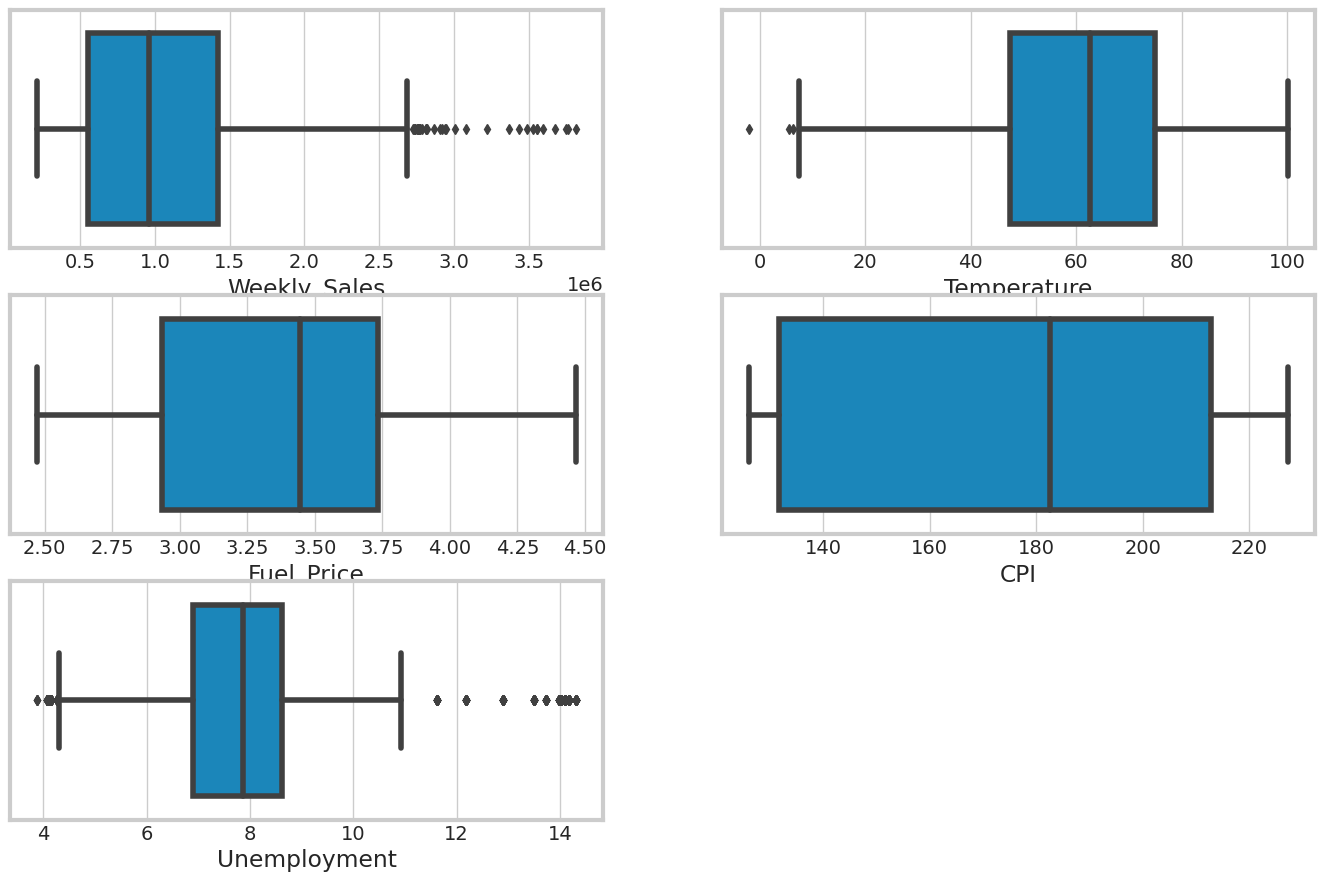

In [10]:
n = 1
cols =["Weekly_Sales","Temperature","Fuel_Price","CPI","Unemployment","Linear trend","Linear trend"]
plt.figure(figsize=(15,10))
for i in cols:
        if n<=5:
            plt.subplot(3,2,n);
            n+=1
            sns.boxplot(x = df[i])
            plt.xlabel(i)

In [11]:
l = ["Weekly_Sales","Temperature","Unemployment"]
def outlier_removal(l):
    for i in l:
        Q1  = df[i].quantile(0.25)
        Q3  = df[i].quantile(0.75)
        IQR = Q3-Q1
        Uper = Q3+1.5*IQR
        lower = Q1-1.5*IQR
        df[i]  = np.where(df[i]>Uper,Uper,(np.where(df[i]<lower,lower,df[i])))
outlier_removal(l)

In [12]:
df2 = df.copy()
df2.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Linear trend,Day,Week,Month,Year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,1497908.58,6,17,5,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,1498716.41,3,48,12,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,1499524.24,4,7,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,1500332.07,4,8,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,1501139.90,0,18,5,2010


In [13]:
days = {0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5: 'Friday',6:'Saturday'}
df2['Day'] = df2['Day'].map(days)
months={1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'Novemenber',12:'December'}
df2['Month']= df2['Month'].map(months)
df2.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Linear trend,Day,Week,Month,Year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,1497908.58,Saturday,17,May,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,1498716.41,Wednesday,48,December,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,1499524.24,Thursday,7,February,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,1500332.07,Thursday,8,February,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,1501139.90,Sunday,18,May,2010


In [14]:
x = df.drop(['Weekly_Sales'],axis=1)
y = df['Weekly_Sales']

In [15]:
from sklearn.preprocessing import StandardScaler  
st = StandardScaler()
x_scaled = st.fit_transform(x)

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state= 42)

In [17]:
from sklearn.neighbors import KNeighborsRegressor
#from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.linear_model import LassoCV ,RidgeCV , ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score

In [18]:
def model(y_test,y_train,x_test,x_train,model):
    
    model1 = model()
    model1.fit(x_train,y_train)
    y_pred = model1.predict(x_test)
    r2_score(y_test,y_pred)
    print('-----------------')
    print(model)
    print('-----------------')
    print(f'MSE: {mean_squared_error(y_test,y_pred)}')
    print(f'MAE: {mean_absolute_error(y_test,y_pred)}')
    print(f'R2 : {round(r2_score(y_test,y_pred)*100,2)} %')

In [19]:
x = [model(y_test,y_train,x_test,x_train,i) for i in [LinearRegression,Lasso,Ridge,ElasticNet,RandomForestRegressor,DecisionTreeRegressor,KNeighborsRegressor,GradientBoostingRegressor]]
x

-----------------
<class 'sklearn.linear_model._base.LinearRegression'>
-----------------
MSE: 101922629075.47984
MAE: 238228.2541532096
R2 : 67.37 %
-----------------
<class 'sklearn.linear_model._coordinate_descent.Lasso'>
-----------------
MSE: 101922342490.53262
MAE: 238227.76722520677
R2 : 67.37 %
-----------------
<class 'sklearn.linear_model._ridge.Ridge'>
-----------------
MSE: 101917390088.11102
MAE: 238222.20405230136
R2 : 67.37 %
-----------------
<class 'sklearn.linear_model._coordinate_descent.ElasticNet'>
-----------------
MSE: 122126110400.16092
MAE: 266397.00579626876
R2 : 60.9 %
-----------------
<class 'sklearn.ensemble._forest.RandomForestRegressor'>
-----------------
MSE: 13186844699.859776
MAE: 64379.72696705517
R2 : 95.78 %
-----------------
<class 'sklearn.tree._classes.DecisionTreeRegressor'>
-----------------
MSE: 22548395331.545517
MAE: 83389.37895881895
R2 : 92.78 %
-----------------
<class 'sklearn.neighbors._regression.KNeighborsRegressor'>
----------------

[None, None, None, None, None, None, None, None]